In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import random

# File to Load (Remember to change these)
project_data_to_load = "Resources/Project_Data.csv"
project_data2_to_load = "./Resources/Project_Data_2.csv"

# Read the City and Ride Data

project_data_1 = pd.read_csv(project_data_to_load)
project_data_2 = pd.read_csv(project_data2_to_load)

# project_data_1.head()
project_data_2.head()

# Combine the data into a single dataset
Combined_Data = pd.concat([project_data_1, project_data_2], axis=0)


Combined_Data.head()


,Region,accountid,locationid,Industry,BusinessDate,machineid,ProductID,ChoicePlusInd,SKU,MerchandiseCat,UnitPrice,Sales
0,Central,2152,12622,Healthcare/Hospitals,3/1/2019 0:00,2394005,105,0,5193,Soda,1.75,13
1,Central,2152,12622,Healthcare/Hospitals,3/1/2019 0:00,2394005,108,0,5197,Soda,1.75,20
2,Central,2152,12622,Healthcare/Hospitals,3/1/2019 0:00,2394005,110,1,5204,Diet Soda,1.75,4
3,Central,2152,12622,Healthcare/Hospitals,3/1/2019 0:00,2394005,111,1,5206,Diet Soda,1.75,11
4,Central,2152,12622,Healthcare/Hospitals,3/1/2019 0:00,2394005,113,1,5207,Diet Soda,1.75,4


In [3]:
IndustryTopSales=Combined_Data.loc[Combined_Data['Industry'] == 'Office - Clerical (Data Processing, Call Ctr)']

# IndustryTopSales.head(20)

# SalesByMerchCat=pd.DataFrame(IndustryTopSales.groupby(['MerchandiseCat'])['Sales'].sum())
SalesByMerchCat=pd.DataFrame(IndustryTopSales.groupby(['Region', 'MerchandiseCat'])['Sales'].mean())
SalesByMerchCat = SalesByMerchCat.sort_values("Sales", ascending=False)
SalesByMerchCat.head(20).reset_index()

,Region,MerchandiseCat,Sales
0,Central,Soda Can,13.299383
1,Mid South,Diet Soda Can,11.629699
2,Mid South,Soda Can,11.267054
3,Midwest,Soda Can,10.911538
4,Pacific,Soda Can,10.892968
5,Central,Diet Soda Can,10.246499
6,Southeast,Soda Can,9.615385
7,Pacific,Diet Soda Can,9.427778
8,Midwest,Diet Soda Can,9.220000
9,Pacific,Water,8.722222


In [4]:
# IndustryTopSales=Combined_Data.loc[Combined_Data['Industry'] == 'Office - Clerical (Data Processing, Call Ctr)']

# # IndustryTopSales.head(20)

# SalesByMerchCat=pd.DataFrame(IndustryTopSales.groupby(['MerchandiseCat'])['Sales'].sum())
SalesByMerchCat=pd.DataFrame(Combined_Data.groupby(['Region', 'MerchandiseCat'])['UnitPrice'].mean())
SalesByMerchCat = SalesByMerchCat.sort_values("MerchandiseCat", ascending=False)
SalesByMerchCat.head(20).reset_index()

,Region,MerchandiseCat,UnitPrice
0,Southeast,Water,1.801759
1,Mid South,Water,1.318345
2,Pacific,Water,1.281415
3,Central,Water,1.423605
4,Midwest,Water,1.386672
5,Mid-Atlantic,Water,1.659259
6,Pacific,Vitamin Enhanced,1.650126
7,Southeast,Vitamin Enhanced,1.896037
8,Midwest,Vitamin Enhanced,1.841688
9,Central,Vitamin Enhanced,1.790818


In [5]:
# Calculate unique products by Industry
# UniqueProductsByIndustry = pd.DataFrame(Combined_Data.groupby(['Industry'])['SKU'].nunique())

UniqueProductsByIndustry = pd.DataFrame(Combined_Data.groupby(['Region', 'Industry', 'ChoicePlusInd'])['SKU'].nunique())
UniqueProductsByIndustry.rename(columns={'SKU':'Product Count'}, inplace=True) # Rename columns

UniqueProductsByIndustry = UniqueProductsByIndustry.reset_index()

UniqueProductsByIndustry.head()

,Region,Industry,ChoicePlusInd,Product Count
0,Central,"Amusement, Family Entertainment, Sports Center...",0,304
1,Central,"Amusement, Family Entertainment, Sports Center...",1,66
2,Central,Corrections,0,195
3,Central,Corrections,1,41
4,Central,Corrections - Inmate,0,155


In [6]:
region_mc= Combined_Data.groupby("Region")["machineid"].count()
region_mc

Region
Central         269602
Mid South       191392
Mid-Atlantic    296430
Midwest         346672
Pacific         225444
Southeast       161658
Name: machineid, dtype: int64

In [7]:
region_sales= Combined_Data.groupby("Region")["Sales"].sum()
region_sales

Region
Central          991936
Mid South        678111
Mid-Atlantic    1156292
Midwest         1410318
Pacific          985993
Southeast        560661
Name: Sales, dtype: int64

In [9]:
region_mcsales_df= pd.DataFrame({"Sales": region_sales,
                                 "Machine Count": region_mc})

region_mcsales_df.reset_index()

,Region,Sales,Machine Count
0,Central,991936,269602
1,Mid South,678111,191392
2,Mid-Atlantic,1156292,296430
3,Midwest,1410318,346672
4,Pacific,985993,225444
5,Southeast,560661,161658


In [10]:
x_axis = region_mcsales_df['Machine Count']
y_axis = region_mcsales_df['Sales']


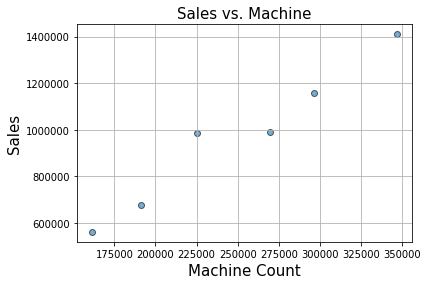

In [32]:
plt.scatter(x=x_axis,y=y_axis, marker="o",alpha=.6, linewidth=1, edgecolors="black")
plt.grid()
plt.title('Sales vs. Machine', fontsize=15)
plt.xlabel('Machine Count', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.savefig('SalesbyMachineCount.png')

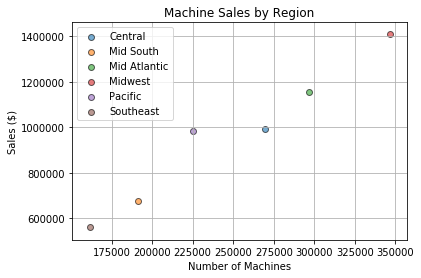

In [33]:
y = [991936] # Central 
y_2= [678111] # Mid South
y_3= [1156292] # Mid-Atlantic
y_4= [1410318] # Midwest
y_5=[985993] # Pacific
y_6=[560661] #Southeast








x = [269602] # Central
x_2 = [191392] # Mid South
x_3= [296430] # Mid Atlantic
x_4= [346672] # Midwest
x_5= [225444] # Pacific
x_6= [161658] # Southeast
plt.scatter(x=x,y=y, label= 'Central', marker="o", alpha=.6, linewidth=1, edgecolors="black")
plt.scatter(x=x_2,y=y_2, label= 'Mid South', marker="o", alpha=.6, linewidth=1, edgecolors="black")
plt.scatter(x=x_3,y=y_3, label= 'Mid Atlantic', marker="o", alpha=.6, linewidth=1, edgecolors="black")
plt.scatter(x=x_4,y=y_4, label= 'Midwest', marker="o", alpha=.6, linewidth=1, edgecolors="black")
plt.scatter(x=x_5,y=y_5, label= 'Pacific', marker="o", alpha=.6, linewidth=1, edgecolors="black")
plt.scatter(x=x_6,y=y_6, label= 'Southeast', marker="o", alpha=.6, linewidth=1, edgecolors="black")


plt.title("Machine Sales by Region")
plt.legend()
plt.xlabel("Number of Machines")
plt.ylabel("Sales ($)")
plt.savefig('MachineSalesbyRegion.png')
plt.grid(True)

plt.show()

## Summary by Region

In [17]:
AccountsByRegion = pd.DataFrame(Combined_Data.groupby('Region')['accountid'].nunique())
LocationsByRegion = pd.DataFrame(Combined_Data.groupby('Region')['locationid'].nunique())
IndustryByRegion = pd.DataFrame(Combined_Data.groupby('Region')['Industry'].nunique())
MachineByRegion = pd.DataFrame(Combined_Data.groupby('Region')['machineid'].nunique())
ProductsByRegion = pd.DataFrame(Combined_Data.groupby('Region')['ProductID'].nunique())
MerchandiseByRegion = pd.DataFrame(Combined_Data.groupby('Region')['MerchandiseCat'].nunique())
TotalSalesByRegion = pd.DataFrame(Combined_Data.groupby('Region')['Sales'].sum())

Region_Summary = AccountsByRegion.merge(LocationsByRegion, on=(['Region']))
Region_Summary = Region_Summary.merge(IndustryByRegion, on=(['Region']))
Region_Summary = Region_Summary.merge(MachineByRegion, on=(['Region']))
Region_Summary = Region_Summary.merge(ProductsByRegion, on=(['Region']))
Region_Summary = Region_Summary.merge(MerchandiseByRegion, on=(['Region']))
Region_Summary = Region_Summary.merge(TotalSalesByRegion, on=(['Region']))

Region_Summary.rename(columns={'accountid':'Accounts', 'locationid':'Locations', 'machineid':'Machines', 'ProductID':'Products', 'MerchandiseCat':'Merch Categories', 'Sales':'Total Sales'}, inplace=True) # Rename columns
Region_Summary = Region_Summary.sort_values("Total Sales", ascending=False)
Region_Summary["Total Sales"] = Region_Summary["Total Sales"].map("${:,.2f}".format) 
Region_Summary = Region_Summary.reset_index()
Region_Summary.head(6)

,Region,Accounts,Locations,Industry,Machines,Products,Merch Categories,Total Sales
0,Midwest,2790,5878,24,10952,1281,26,"$1,410,318.00"
1,Mid-Atlantic,1929,4910,24,8509,1164,25,"$1,156,292.00"
2,Central,1956,4376,24,7564,1137,25,"$991,936.00"
3,Pacific,1760,4138,24,7289,1250,25,"$985,993.00"
4,Mid South,1147,2845,24,4616,735,25,"$678,111.00"
5,Southeast,1005,2345,23,4331,816,26,"$560,661.00"


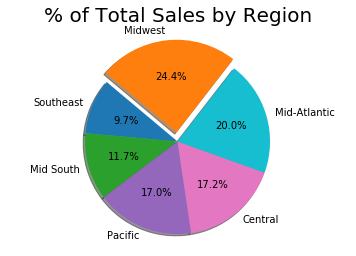

In [30]:
# Create dataframe for Fares by city, sort, and reset index
SalesByRegion = pd.DataFrame(Combined_Data.groupby('Region')['Sales'].sum())
SalesByRegion = SalesByRegion.sort_values("Sales", ascending=True)
SalesByRegion = SalesByRegion.reset_index()

# create and set variables for pie chart
Labels = SalesByRegion["Region"]
SalesAmt = SalesByRegion["Sales"]
# Colors = ["orange", "lightskyblue", "lightcoral"]
Colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#17becf", "#ff7f0e"]
Explode = (0, 0, 0, 0, 0, 0.1)

# plot pie chart
plt.title("% of Total Sales by Region", fontsize=20)
plt.pie(SalesAmt, explode=Explode, labels=Labels, colors=Colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# plt.figure(figsize=(20,10))
# plt.savefig("images/TotalFaresByCityType.png")
plt.savefig('TotalSalesbyRegion.png')
plt.show()

# Combined_Data.groupby("Region").sum()["Sales"].plot(kind="pie")

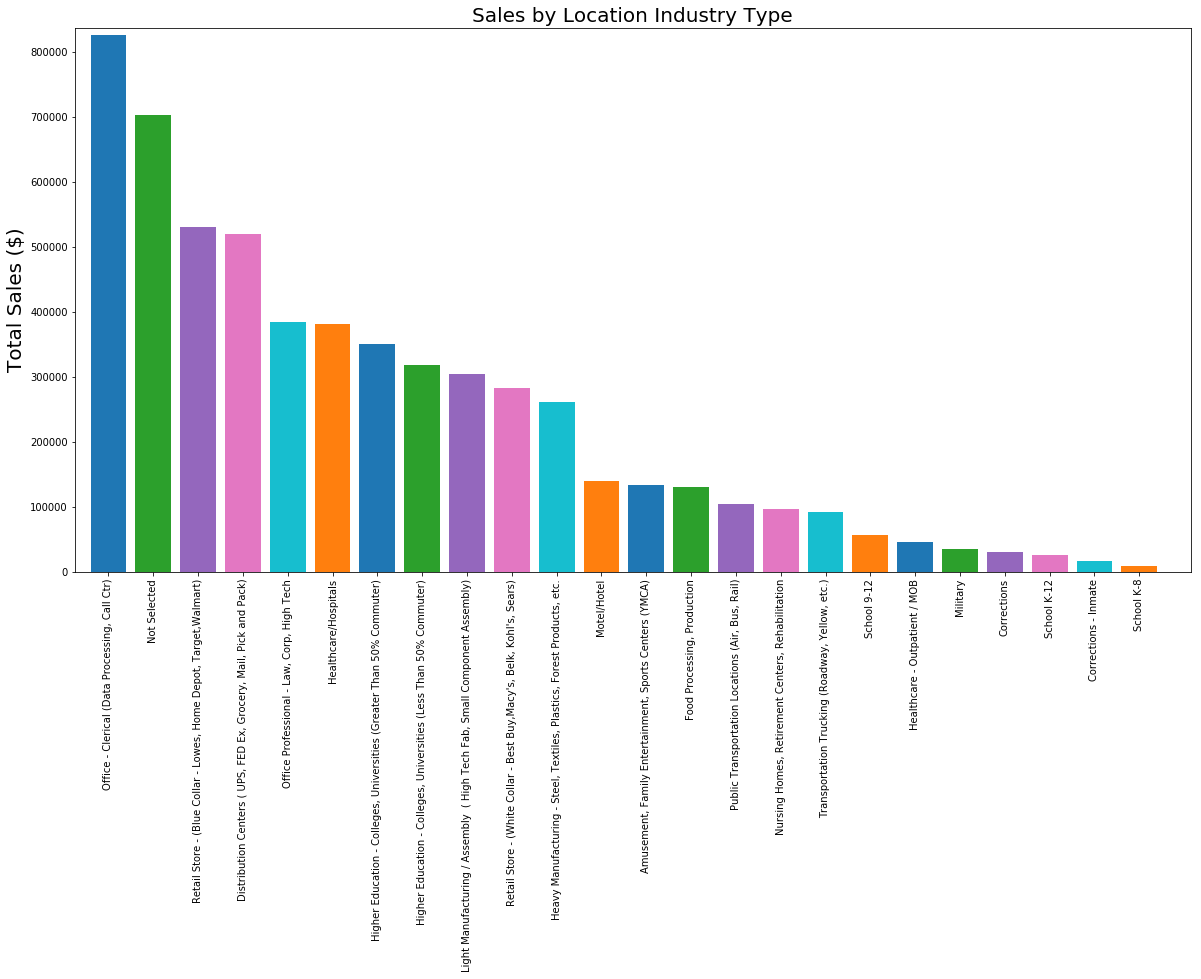

In [29]:
# Create dataframe for Fares by city, sort, and reset index
SalesByRegion = pd.DataFrame(Combined_Data.groupby('Industry')['Sales'].sum())
SalesByRegion = SalesByRegion.sort_values("Sales", ascending=False)
# SalesByRegion["Sales"] = SalesByRegion["Sales"].map("{:,.2f}".format) 
SalesByRegion = SalesByRegion.reset_index()

# create and set variables for pie chart
Labels = SalesByRegion["Industry"]
SalesAmt = SalesByRegion["Sales"]
# Colors = ["orange", "lightskyblue", "lightcoral"]
Colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#17becf", "#ff7f0e"]


# plot bar chart
plt.figure(figsize=(20,10))
plt.bar(Labels, SalesAmt, color=Colors, alpha=1, align="center") # alpha = transparency; darker red
tick_locations = [value for value in Labels]
plt.xticks(tick_locations, Labels, rotation="vertical")
plt.title("Sales by Location Industry Type", fontsize=20)
# plt.xlabel('Total Sales for Division ($)', fontsize=20)
plt.ylabel('Total Sales ($)', fontsize=20)
plt.xlim(-0.75, len(Labels)+.15)
plt.ylim(0, max(SalesAmt)+10000)
plt.savefig('ProductSalesbyIndustry.png')
plt.show()

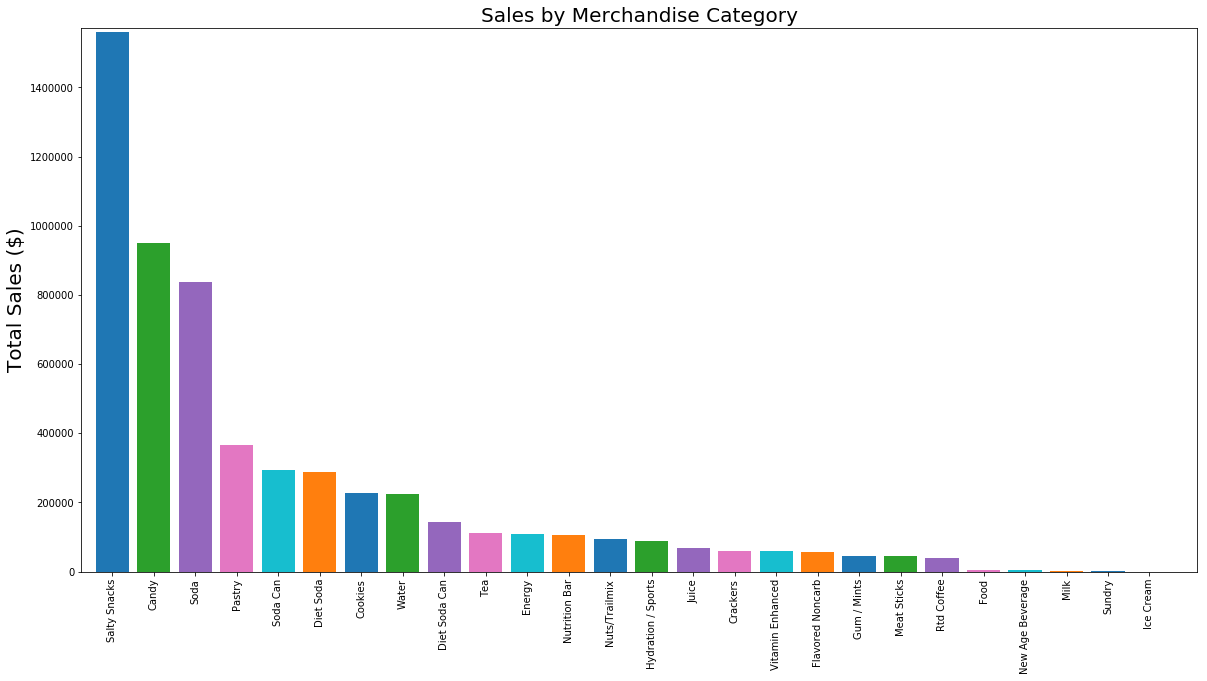

In [28]:
# Create dataframe for Fares by city, sort, and reset index
SalesByRegion = pd.DataFrame(Combined_Data.groupby('MerchandiseCat')['Sales'].sum())
SalesByRegion = SalesByRegion.sort_values("Sales", ascending=False)
# SalesByRegion["Sales"] = SalesByRegion["Sales"].map("${:.2f}".format) 
SalesByRegion = SalesByRegion.reset_index()

# create and set variables for pie chart
Labels = SalesByRegion["MerchandiseCat"]
SalesAmt = SalesByRegion["Sales"]
# Colors = ["orange", "lightskyblue", "lightcoral"]
Colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#17becf", "#ff7f0e"]


# plot bar chart
plt.figure(figsize=(20,10))
plt.bar(Labels, SalesAmt, color=Colors, alpha=1, align="center") # alpha = transparency; darker red
tick_locations = [value for value in Labels]
plt.xticks(tick_locations, Labels, rotation="vertical")
plt.title("Sales by Merchandise Category", fontsize=20)
plt.ylabel('Total Sales ($)', fontsize=20)
plt.xlim(-0.75, len(Labels)+.15)
plt.ylim(0, max(SalesAmt)+10000)
plt.savefig('SalesbyMerchCat.png')
plt.show()

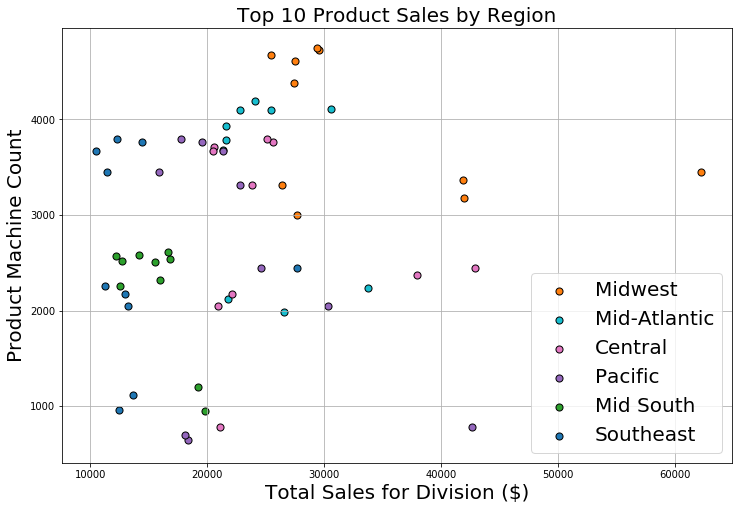

In [27]:
# Midwest Data
MidwestData =  Combined_Data.loc[Combined_Data["Region"]== "Midwest"]
MidwestMachines = pd.DataFrame(MidwestData.groupby(['ProductID'])['machineid'].nunique())
MidwestTopSellers = pd.DataFrame(MidwestData.groupby(['Region', 'ProductID'])['Sales'].sum())
MidwestTopSellers = MidwestTopSellers.sort_values('Sales', ascending=False)
MidwestTopTen = pd.DataFrame(MidwestTopSellers.head(10))
MidwestSummary = MidwestTopTen.merge(MidwestMachines, on=(['ProductID']))
MidwestSummary = MidwestSummary.reset_index()

# Mid-Atlantic Data
MidAtlanticData =  Combined_Data.loc[Combined_Data["Region"]== "Mid-Atlantic"]
MidAtlanticMachines = pd.DataFrame(MidAtlanticData.groupby(['ProductID'])['machineid'].nunique())
MidAtlanticTopSellers = pd.DataFrame(MidAtlanticData.groupby(['Region', 'ProductID'])['Sales'].sum())
MidAtlanticTopSellers = MidAtlanticTopSellers.sort_values('Sales', ascending=False)
MidAtlanticTopTen = pd.DataFrame(MidAtlanticTopSellers.head(10))
MidAtlanticSummary = MidAtlanticTopTen.merge(MidAtlanticMachines, on=(['ProductID']))
MidAtlanticSummary = MidAtlanticSummary.reset_index()

# Mid South Data
MidSouthData =  Combined_Data.loc[Combined_Data["Region"]== "Mid South"]
MidSouthMachines = pd.DataFrame(MidSouthData.groupby(['ProductID'])['machineid'].nunique())
MidSouthTopSellers = pd.DataFrame(MidSouthData.groupby(['Region', 'ProductID'])['Sales'].sum())
MidSouthTopSellers = MidSouthTopSellers.sort_values('Sales', ascending=False)
MidSouthTopTen = pd.DataFrame(MidSouthTopSellers.head(10))
MidSouthSummary = MidSouthTopTen.merge(MidSouthMachines, on=(['ProductID']))
MidSouthSummary = MidSouthSummary.reset_index()

# Central Data
CentralData =  Combined_Data.loc[Combined_Data["Region"]== "Central"]
CentralDataMachines = pd.DataFrame(CentralData.groupby(['ProductID'])['machineid'].nunique())
CentralDataTopSellers = pd.DataFrame(CentralData.groupby(['Region', 'ProductID'])['Sales'].sum())
CentralDataTopSellers = CentralDataTopSellers.sort_values('Sales', ascending=False)
CentralDataTopTen = pd.DataFrame(CentralDataTopSellers.head(10))
CentralDataSummary = CentralDataTopTen.merge(CentralDataMachines, on=(['ProductID']))
CentralDataSummary = CentralDataSummary.reset_index()

# Pacific Data
PacificData =  Combined_Data.loc[Combined_Data["Region"]== "Pacific"]
PacificDataMachines = pd.DataFrame(PacificData.groupby(['ProductID'])['machineid'].nunique())
PacificDataTopSellers = pd.DataFrame(PacificData.groupby(['Region', 'ProductID'])['Sales'].sum())
PacificDataTopSellers = PacificDataTopSellers.sort_values('Sales', ascending=False)
PacificDataTopTen = pd.DataFrame(PacificDataTopSellers.head(10))
PacificDataSummary = PacificDataTopTen.merge(CentralDataMachines, on=(['ProductID']))
PacificDataSummary = PacificDataSummary.reset_index()

# Southeast Data
SoutheastData =  Combined_Data.loc[Combined_Data["Region"]== "Southeast"]
SoutheastDataMachines = pd.DataFrame(SoutheastData.groupby(['ProductID'])['machineid'].nunique())
SoutheastDataTopSellers = pd.DataFrame(SoutheastData.groupby(['Region', 'ProductID'])['Sales'].sum())
SoutheastDataTopSellers = SoutheastDataTopSellers.sort_values('Sales', ascending=False)
SoutheastDataTopTen = pd.DataFrame(SoutheastDataTopSellers.head(10))
SoutheastDataSummary = SoutheastDataTopTen.merge(CentralDataMachines, on=(['ProductID']))
SoutheastDataSummary = SoutheastDataSummary.reset_index()


ax1 = MidwestSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color="#ff7f0e", edgecolor='black', alpha=1, label="Midwest", figsize=(12,8))
ax2 = MidAtlanticSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color="#17becf", edgecolor='black', alpha=1, ax=ax1, label='Mid-Atlantic')
ax3 = CentralDataSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color="#e377c2", edgecolor='black', alpha=1, ax=ax1, label='Central')
ax4 = PacificDataSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color="#9467bd", edgecolor='black', alpha=1, ax=ax1, label='Pacific')
ax5 = MidSouthSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color="#2ca02c", edgecolor='black', alpha=1, ax=ax1, label='Mid South')
ax6 = SoutheastDataSummary.plot(kind='scatter', x='Sales', y='machineid', marker="o", s=50, color='#1f77b4', edgecolor='black', alpha=1, ax=ax1, label='Southeast')


# plt.text(.95, 0.5, "Note: Circle size corresponds with the driver count per city.", fontsize=15, transform=plt.gcf().transFigure)
plt.legend(fontsize=20)
plt.grid()
plt.title('Top 10 Product Sales by Region', fontsize=20)
plt.xlabel('Total Sales for Division ($)', fontsize=20)
plt.ylabel('Product Machine Count', fontsize=20)
plt.savefig('ProductSalesbyRegion_machinect.png')
plt.show()


In [23]:
#Total Sales By Product and Region
Combined_Data["Total Sales"] = Combined_Data["UnitPrice"] * Combined_Data["Sales"]
sales_region = pd.DataFrame(Combined_Data.groupby(["Region", "ProductID"]).sum())

top_sales = sales_region["Total Sales"].groupby(level=0, group_keys=False)
top_sales.nlargest(10).reset_index()

,Region,ProductID,Total Sales
0,Central,105,63302.55
1,Central,108,55323.45
2,Central,140,32723.90
3,Central,255,30056.35
4,Central,649,28756.75
5,Central,17739,27998.50
6,Central,17745,27505.20
7,Central,1327,26660.25
8,Central,110,25714.05
9,Central,355,22299.05


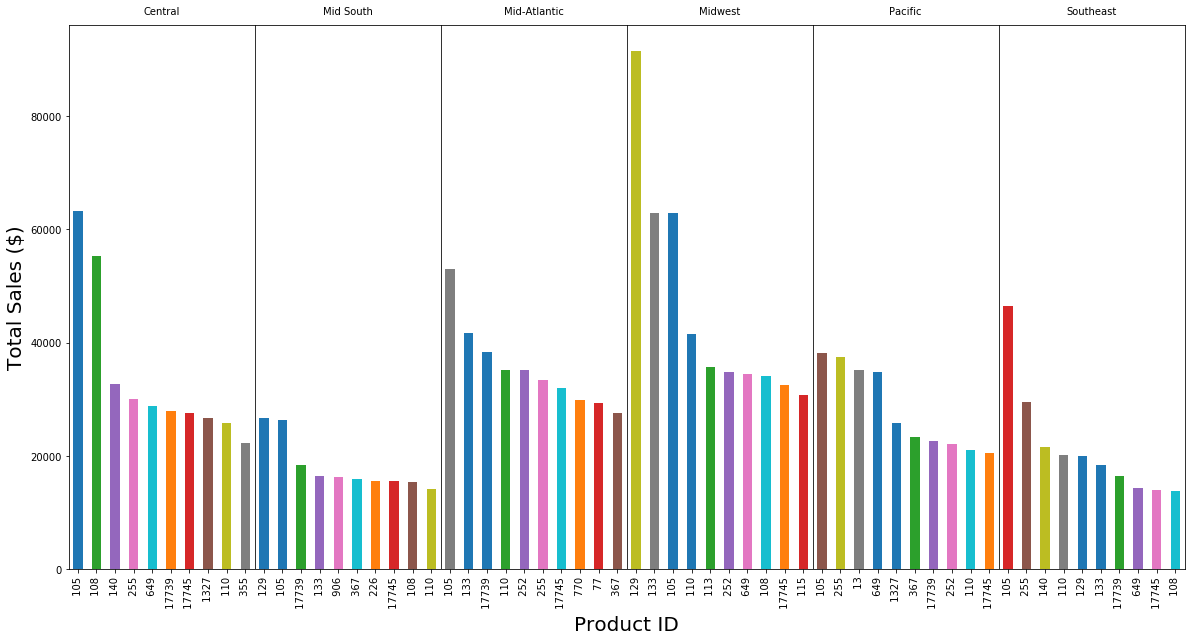

In [24]:
top_per_region = top_sales.nlargest(10)
ax = top_per_region.plot(kind='bar', figsize= (20,10) , color=["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#17becf", "#ff7f0e", "#d62728", "#8c564b", "#bcbd22", "#7f7f7f"])

ct_region = top_per_region.groupby("Region").count()
nplines = np.cumsum(ct_region)
for i in range(len(ct_region)):
    title = ct_region.index.values[i]
    ax.axvline(nplines[i]-.5, lw=0.8, color= "k")
    ax.text(nplines[i]-(ct_region[i]+1)/2., 1.02, title, ha='center', transform=ax.get_xaxis_transform())

ax.set_xticklabels([l.get_text().split(",")[1][:-1] for l in ax.get_xticklabels()])
plt.xlabel('Product ID', fontsize=20)
plt.ylabel('Total Sales ($)', fontsize=20)
plt.savefig('ProductSalesbyRegion.png')
plt.show()

# Industry Sales by Region

In [25]:
sales_industry = pd.DataFrame(Combined_Data.groupby(["Region", "Industry"]).sum())

top_sales = sales_industry["Total Sales"].groupby(level=0, group_keys=False)
top_sales.nlargest(10).reset_index()

,Region,Industry,Total Sales
0,Central,"Office - Clerical (Data Processing, Call Ctr)",160701.45
1,Central,Not Selected,135263.95
2,Central,"Higher Education - Colleges, Universities (Gre...",130156.00
3,Central,"Retail Store - (Blue Collar - Lowes, Home Depo...",124457.20
4,Central,"Distribution Centers ( UPS, FED Ex, Grocery, M...",106412.30
5,Central,Healthcare/Hospitals,104544.25
6,Central,Light Manufacturing / Assembly ( High Tech Fa...,68770.30
7,Central,"Public Transportation Locations (Air, Bus, Rail)",67279.45
8,Central,"Heavy Manufacturing - Steel, Textiles, Plastic...",62832.20
9,Central,"Office Professional - Law, Corp, High Tech",59141.10


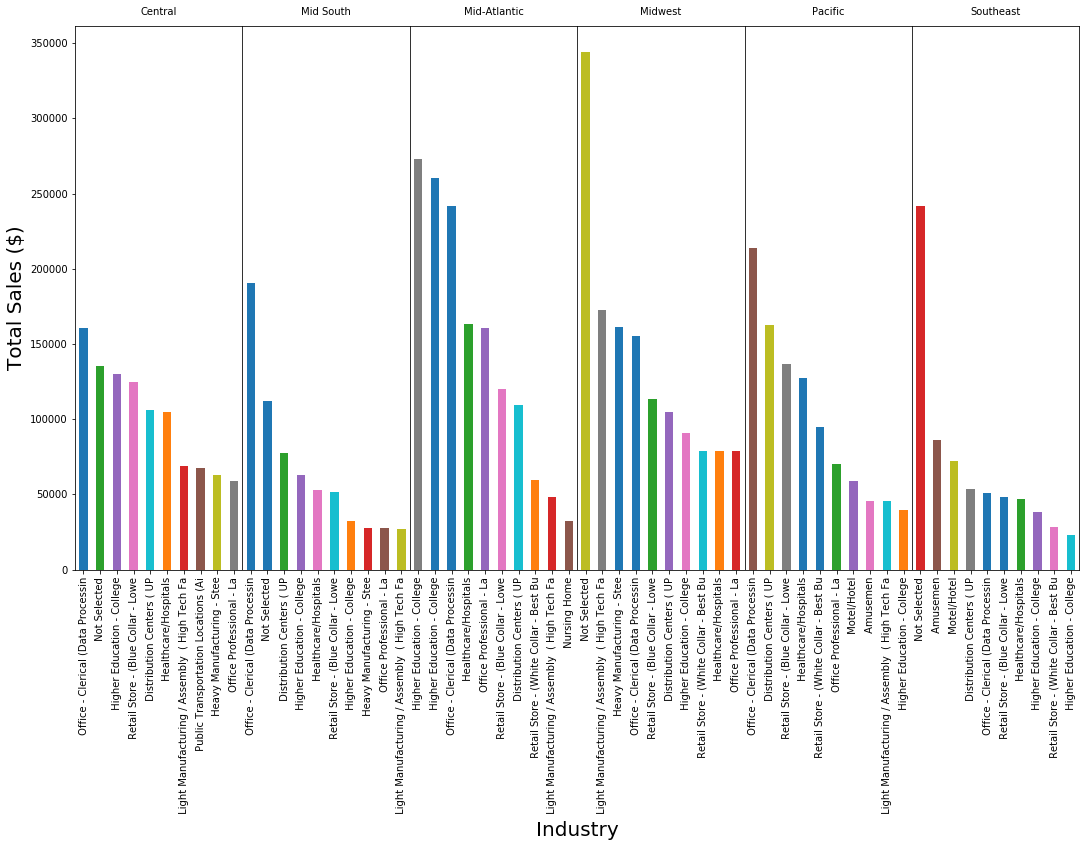

In [36]:
top_ind_region = top_sales.nlargest(10)
ax = top_ind_region.plot(kind='bar', figsize= (18,10) , color=["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#17becf", "#ff7f0e", "#d62728", "#8c564b", "#bcbd22", "#7f7f7f"])

ct_industry = top_ind_region.groupby("Region").count()
nplines = np.cumsum(ct_industry)
for i in range(len(ct_industry)):
    title = ct_industry.index.values[i]
    ax.axvline(nplines[i]-.5, lw=0.8, color= "k")
    ax.text(nplines[i]-(ct_industry[i]+1)/2., 1.02, title, ha='center', transform=ax.get_xaxis_transform())

ax.set_xticklabels([l.get_text().split(",")[1][:-1] for l in ax.get_xticklabels()])
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Total Sales ($)', fontsize=20)
plt.savefig('IndustrySalesbyRegion.png')
plt.show()